## Import Bibliotheken

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data/Colab

In [3]:
cols = ["fLength","fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"] 
df = pd.read_csv("data/magic04.data", names= cols)

In [4]:
df.head(3)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g


In [5]:
df.tail(3)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h
19019,187.1814,53.0014,3.2093,0.2876,0.1539,-167.3125,-168.4558,31.4755,52.7310,272.3174,h


In [6]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [7]:
# set target as integer | g = 1 , h = 0
df["class"] = (df["class"]== "g").astype(int)

In [8]:
df.sample(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
4539,64.3959,14.2694,2.8331,0.5037,0.3664,-47.0293,-16.9877,-12.8025,0.9486,283.070,1
4598,95.7927,51.1362,4.1743,0.0990,0.0511,51.2509,70.6563,-36.7337,0.6800,310.933,1
4194,17.1452,11.0701,2.3692,0.5897,0.2970,-3.6438,9.0615,-4.9178,13.8530,129.811,1
12468,20.6460,9.5423,2.5366,0.6134,0.3881,4.0757,-15.1579,-10.1771,81.0147,104.654,0
4069,43.5993,17.8827,2.9814,0.2787,0.1394,-15.2644,-27.7352,-16.5339,7.8899,195.593,1


In [9]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.6 MB


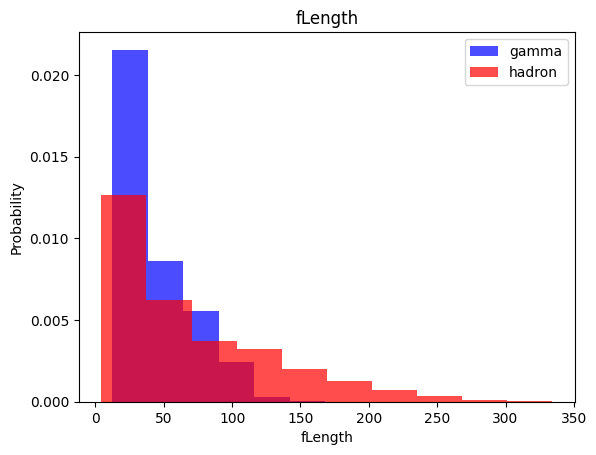

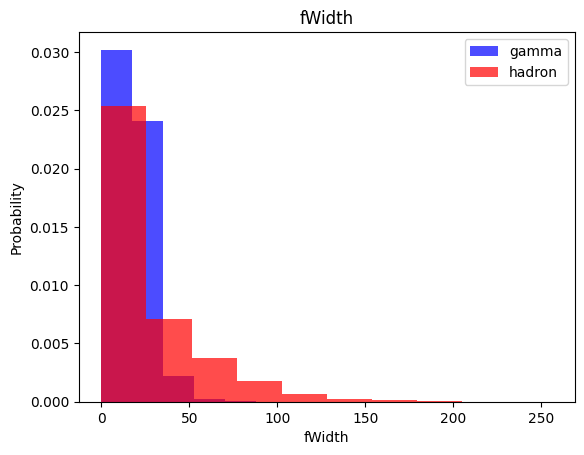

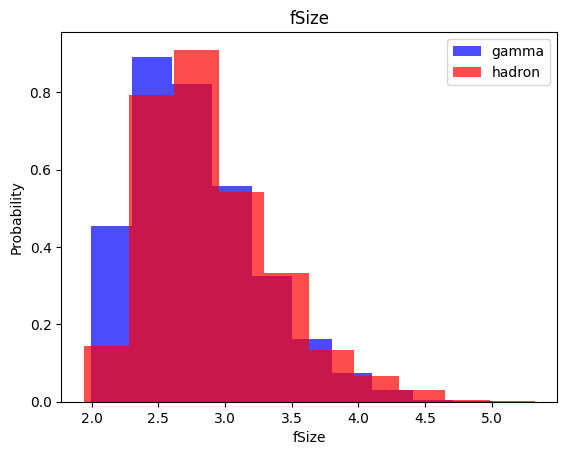

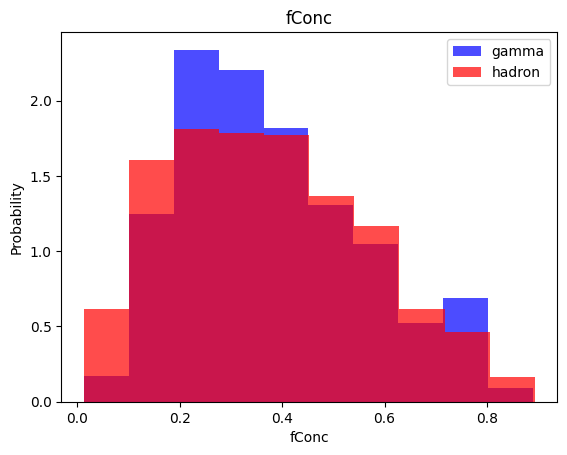

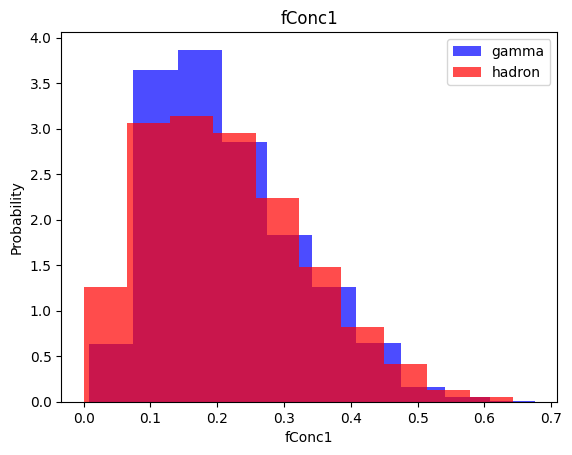

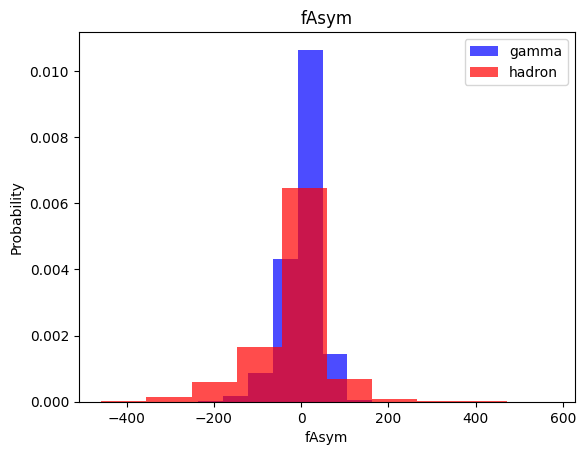

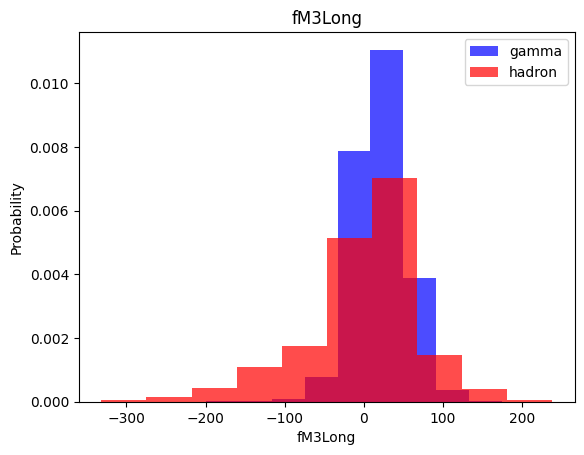

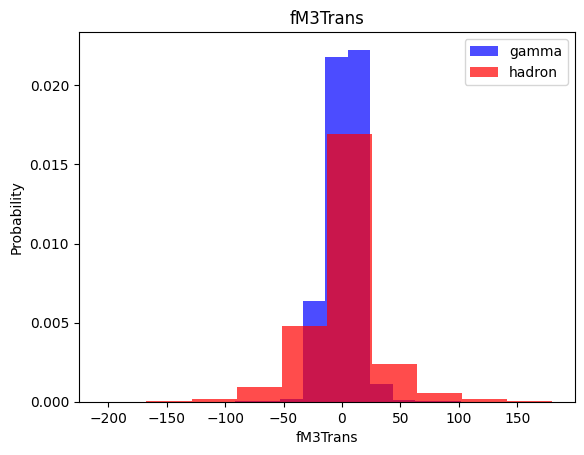

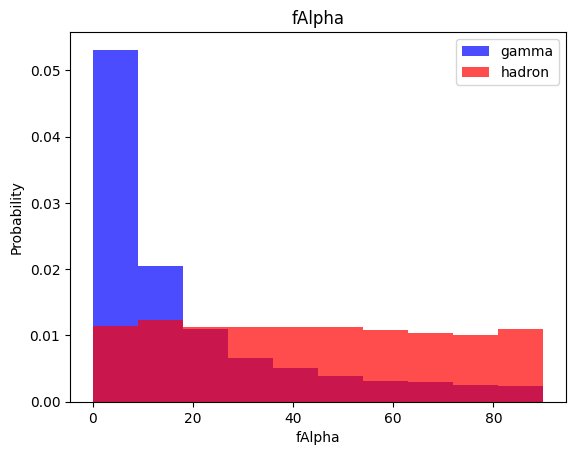

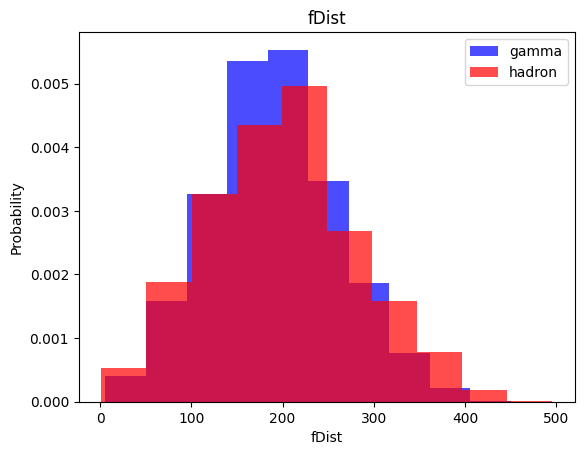

In [11]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color ="blue", label="gamma", alpha = 0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color ="red", label="hadron", alpha = 0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, validation, test datasets

In [12]:
# 60% test, 20% valid, 20% test
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\AKony\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [13]:
print(len(df))
print(len(train))
print(len(valid))
print(len(test))

19020
11412
3804
3804


---

### Alternativ mit sklearn, direkt nach Feature & Targets aufgeteilt

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X1_train, X_temp, y1_train, y_temp = train_test_split(df.drop(columns=["class"]), df["class"], test_size=0.4)

In [16]:
X1_valid, X1_test, y1_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [17]:
print(len(df))
print(len(X1_train))
print(len(y1_train))
print(len(X1_valid))
print(len(y1_valid))
print(len(X1_test))
print(len(y_test))

19020
11412
11412
3804
3804
3804
3804


---

### Scaling and sample imbalance

In [18]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [19]:
print(len(train[train["class"]== 1]))
print(len(train[train["class"]== 0]))
print("sample imbalance")

7406
4006
sample imbalance


In [20]:
def scale_dateset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y, (-1,1))))
    return data, X, y

In [21]:
train, X_train, y_train = scale_dateset(train, oversample=True)

In [22]:
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))

14812
7406
7406


In [23]:
valid, X_valid, y_valid = scale_dateset(valid, oversample=False)
test, X_test, y_test = scale_dateset(test, oversample=False)

---


# Classification Models
## kNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [25]:
knn_model1 = KNeighborsClassifier(n_neighbors=1)
knn_model1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred1 = knn_model1.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1361
           1       0.83      0.90      0.86      2443

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [28]:
knn_model3 = KNeighborsClassifier(n_neighbors=3)
knn_model3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
y_pred3 = knn_model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1361
           1       0.84      0.86      0.85      2443

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [30]:
knn_model5 = KNeighborsClassifier(n_neighbors=5)
knn_model5.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred5 = knn_model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1361
           1       0.84      0.86      0.85      2443

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

In [33]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,y_train)

In [34]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.50      1361
           1       0.73      0.90      0.81      2443

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [37]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1361
           1       0.84      0.83      0.83      2443

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## Support Vector Machine (SVM)

In [39]:
from sklearn.svm import SVC

In [40]:
svc_model = SVC()
svc_model = svc_model.fit(X_train, y_train)

In [41]:
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1361
           1       0.88      0.91      0.89      2443

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Net

In [42]:
import tensorflow as tf

In [43]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(10,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

nn_model.compile(optimizer= tf.keras.optimizers.Adam(0.001),loss="binary_crossentropy", metrics = ["accuracy"])

c:\Users\AKony\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
def plot_loss(history):
    plt.plot(history.history["loss"], label="loss")
    plt.plot(history.history["val_loss"], label= "val_los")
    plt.xlabel("Epoch")
    plt.ylabel("Binary crossentropy")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_accuracy(history):
    plt.plot(history.history["accuracy"], label="accuracy")
    plt.plot(history.history["val_accuracy"], label= "val_accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid(True)
    plt.show()

In [46]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split =0.2, verbose =0
)

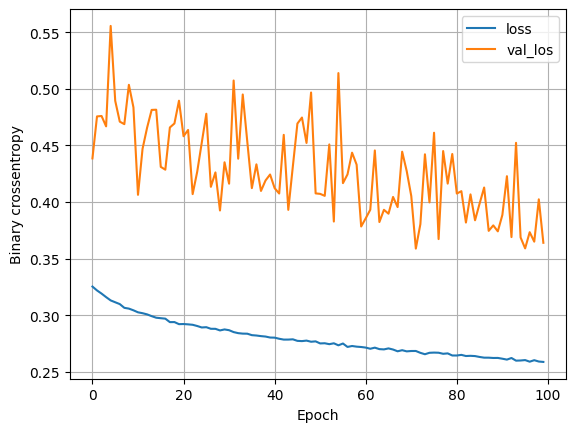

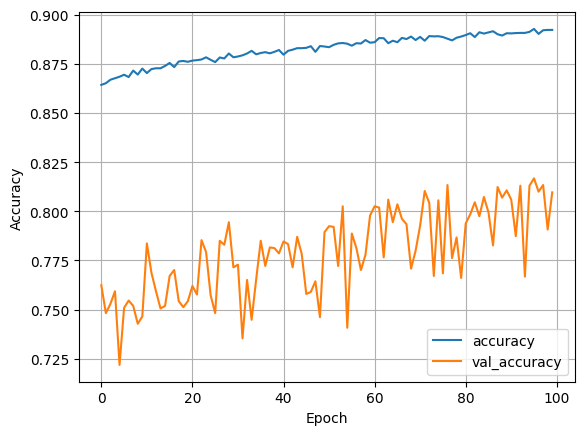

In [48]:
plot_loss(history)
plot_accuracy(history)

Gridsearch on Neural Net

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation="relu", input_shape=(10,)),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

nn_model.compile(optimizer= tf.keras.optimizers.Adam(0.001),loss="binary_crossentropy", metrics = ["accuracy"])